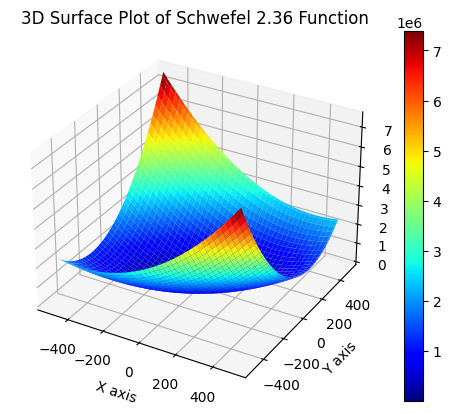

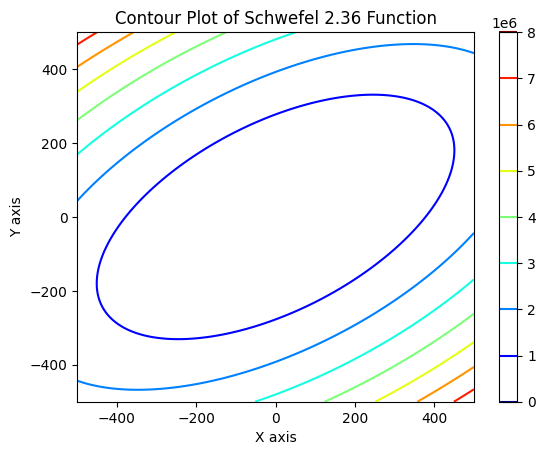

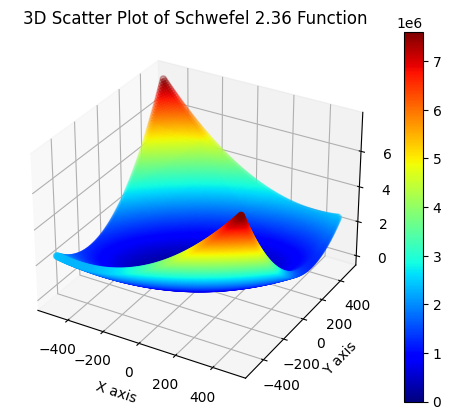

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

def Re_function(x,y):
    return 7* x**2 - 6*np.sqrt(3)*x*y + 13*y**2

r_min, r_max = -500, 500
xaxis = np.linspace(r_min, r_max, 125)
yaxis = np.linspace(r_min, r_max, 125)
x, y = np.meshgrid(xaxis, yaxis)
results = Re_function(x, y)

# 3D surface plot
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
surface = axis.plot_surface(x, y, results, cmap='jet', shade=False)
figure.colorbar(surface)
axis.set_title('3D Surface Plot of Schwefel 2.36 Function')
axis.set_xlabel('X axis')
axis.set_ylabel('Y axis')
axis.set_zlabel('Objective Function')
plt.show()

# Contour plot
plt.contour(x, y, results, cmap='jet')
plt.title('Contour Plot of Schwefel 2.36 Function')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.colorbar()
plt.show()

# 3D scatter plot
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
scatter = axis.scatter(x, y, results, c=results, cmap='jet')
figure.colorbar(scatter)
axis.set_title('3D Scatter Plot of Schwefel 2.36 Function')
axis.set_xlabel('X axis')
axis.set_ylabel('Y axis')
axis.set_zlabel('Objective Function')
plt.show()




In [2]:
# Find the minimum value and its coordinates
min_value = np.min(results)
min_index = np.unravel_index(np.argmin(results, axis=None), results.shape)
optimal_x = x[min_index]
optimal_y = y[min_index]

# Print optimal points
print(f"Optimal point: x = {optimal_x}, y = {optimal_y}, value = {min_value}")

Optimal point: x = 0.0, y = 0.0, value = 0.0


In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []

# Initial parameters
L_0 = 550 # Fixed Markov chain length

# Define the Ackley 2 function
def Re_function(x,y):
    return 7* x**2 - 6*np.sqrt(3)*x*y + 13*y**2

def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = Re_function(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((3000, L_0, data_dimensions))

    for i in range(3000):
        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = Re_function(new_x, new_y) - Re_function(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y



            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = Re_function(current_x, current_y)

        best_solution = (current_x,current_y)
        best_value =Re_function(current_x,current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        #earlier schedule
        # temp = temp*0.95

        # Decrease temperature once every 5 iterations
        if (i + 1) % 5 == 0:
         delta_T = temp * 0.05
         temp -= delta_T



    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data




In [4]:
## Example usage
temp =200 # Initial temperature
bounds = (-500, 500)  # Bounds for the schwefel_function
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data = simulate(temp, Re_function, bounds)

print(f"Best Solution: {best_solution}")
print(f"Best Value: {best_value}")


Best Solution: (0.17406384294139343, 0.36974782842389686)
Best Value: 1.3205165735858735


In [5]:
Error = (min_value - best_value)**2
print(f'Error: {Error}')

Error: 1.7437640211149756


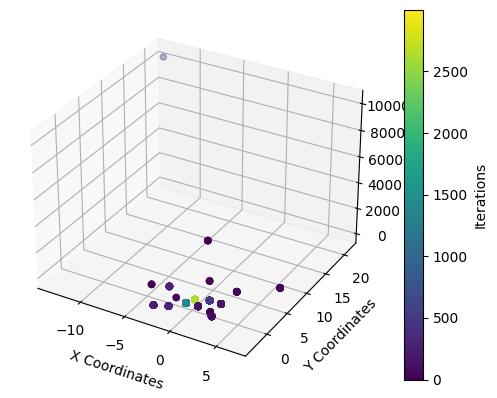

In [6]:
# Extract x and y coordinates from the states array
x_coords = [state[0] for state in states]
y_coords = [state[1] for state in states]

# Extract the function values
z_coords = function_values

# Extract the iterations
iterations_array = iterations

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points with color scheme based on iterations
sc = ax.scatter(x_coords, y_coords, z_coords, c=iterations_array, cmap='viridis')

# Add color bar to show iteration color scheme
plt.colorbar(sc, label='Iterations')

# Set labels
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Function Value (z)')

# Show the plot
plt.show()


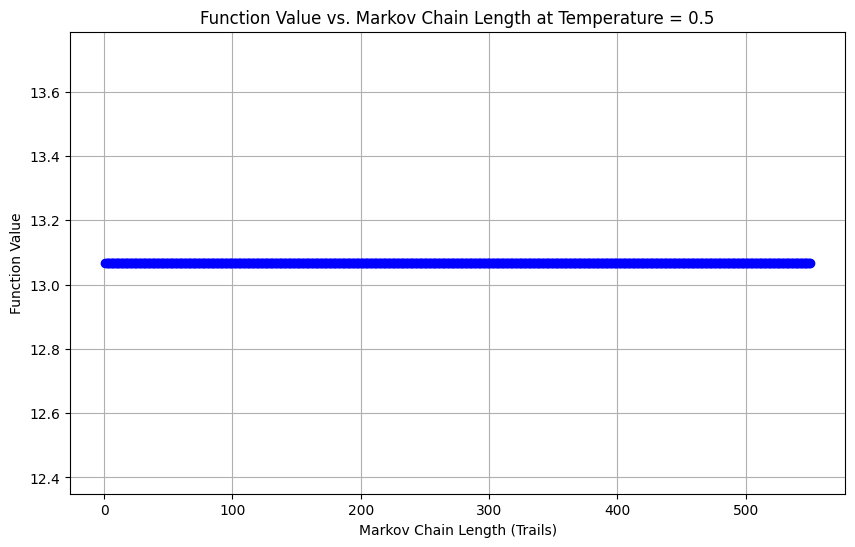

In [7]:
target_temp = 0.5
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))

function_values_for_temp = simulation_data[closest_iteration, :, 2]

# Plot the function values vs. Markov chain length (1 to 550 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title(f'Function Value vs. Markov Chain Length at Temperature = {target_temp}')
plt.grid(True)
plt.show()

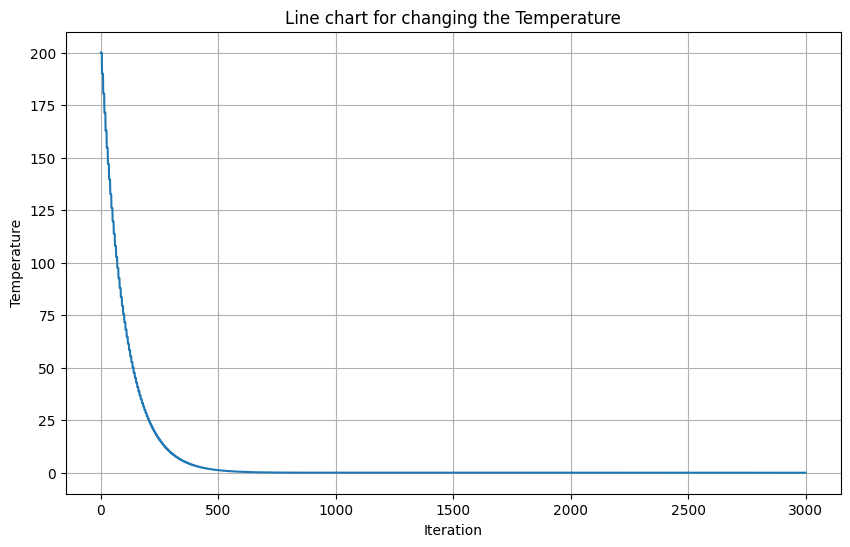

In [8]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iterations,temperatures)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

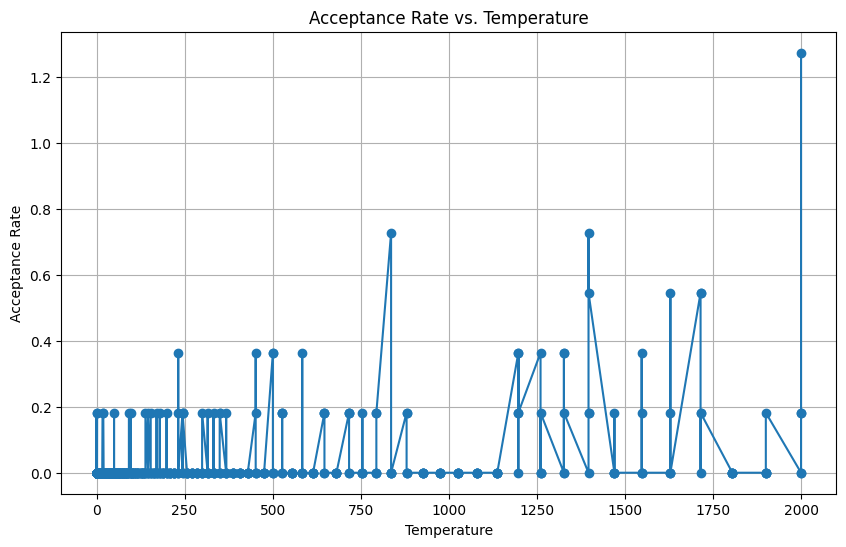

In [9]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Arrays for storing temperatures, function values, iterations, states, and acceptance rates
temperatures = []
function_values = []
iterations = []
states = []
acceptance_rates = []

# Initial parameters
L_0 = 550 # Fixed Markov chain length

# Define the Ackley 2 function
def ackley2(x, y):
    return -x* y * (72 - 2 * x - 2 * y)


def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = func(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((3000, L_0, data_dimensions))

    for i in range(3000):
        accepted_moves = 0  # To count the number of accepted moves

        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = func(new_x, new_y) - func(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y
                accepted_moves += 1  # Increment the accepted moves counter

            current_value = func(current_x, current_y)

            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = func(current_x, current_y)

        acceptance_rate = (accepted_moves / L_i)*100
        acceptance_rates.append(acceptance_rate)

        best_solution = (current_x, current_y)
        best_value = func(current_x, current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        if (i + 1) % 5 == 0:
          delta_T = temp * 0.05
          temp -= delta_T

    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates

# Initial temperature and function bounds
initial_temperature = 2000
bounds = (0, 500)

# Run the simulation
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates = simulate(initial_temperature, ackley2, bounds)

# Plot acceptance rate vs. temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, acceptance_rates, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs. Temperature')
plt.grid(True)
plt.show()
